# Exercises XP

##🌟 Exercise 1: Specific Customer Segmentation Based On RFM Analysis Background

**Objective**: Use ChatGPT to customize an RFM (Recency, Frequency, Monetary) analysis for customer segmentation.
RFM (Recency, Frequency, Monetary) analysis is a method to evaluate customers based on their purchasing behavior. It assesses how recently a customer purchased (Recency), how often they buy (Frequency), and how much they spend (Monetary). This helps in categorizing customers for targeted marketing and understanding customer value.

### Formulate questions to ask ChatGPT that would help in calculating RFM scores for each customer using ‘InvoiceDate’, ‘Quantity’, and ‘UnitPrice’

* How can I calculate the recency of customer transactions based on the 'InvoiceDate' column?
* Can you suggest methods to identify how often a customer has made purchases within a given time frame?
* How do I calculate the monetary value of each customer's transactions considering 'Quantity' and 'UnitPrice'?
* What criteria can I use to segment customers into groups like 'High-Value', 'Loyal', or 'New' based on RFM scores?
* What are some best practices for analyzing customer behavior using RFM scores?
* Can you suggest approaches to visualize and interpret RFM segmentation results effectively?
* Are there common pitfalls in RFM analysis that I should consider while interpreting results?
* What additional variables or features could complement RFM scores for a more comprehensive customer segmentation?

In [5]:
# import the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [11]:
import pandas as pd

# Load the dataset
df = pd.read_csv('data.csv', encoding='ISO-8859-1')

# Explore the dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [19]:
# How can I calculate the recency of customer transactions based on the 'InvoiceDate' column?

# Calculate the most recent transaction date
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
most_recent_date = df['InvoiceDate'].max()

# Calculate recency for each customer
df['Recency'] = (most_recent_date - df.groupby('CustomerID')['InvoiceDate'].max()).dt.days

# Display the result
print(df[['CustomerID', 'Recency']].head(15))

    CustomerID  Recency
0      17850.0      NaN
1      17850.0      NaN
2      17850.0      NaN
3      17850.0      NaN
4      17850.0      NaN
5      17850.0      NaN
6      17850.0      NaN
7      17850.0      NaN
8      17850.0      NaN
9      13047.0      NaN
10     13047.0      NaN
11     13047.0      NaN
12     13047.0      NaN
13     13047.0      NaN
14     13047.0      NaN


In [23]:
# Can you suggest methods to identify how often a customer has made purchases within a given time frame?

# Calculate the number of transactions per customer
transaction_count = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
transaction_count.columns = ['CustomerID', 'TransactionCount']

# Display the result
print(transaction_count.head())

   CustomerID  TransactionCount
0     12346.0                 2
1     12347.0                 7
2     12348.0                 4
3     12349.0                 1
4     12350.0                 1


In [31]:
# How do I calculate the monetary value of each customer's transactions considering 'Quantity' and 'UnitPrice'?

# Calculate the total amount spent for each transaction
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

# Calculate the total monetary value for each customer
total_monetary_value = df.groupby('CustomerID')['TotalAmount'].sum().reset_index()
total_monetary_value.columns = ['CustomerID', 'TotalMonetaryValue']

# Display the result
total_monetary_value.head()

,CustomerID,TotalMonetaryValue
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [32]:
# What criteria can I use to segment customers into groups like 'High-Value', 'Loyal', or 'New' based on RFM scores?

Segmenting customers based on RFM (Recency, Frequency, Monetary) scores involves defining criteria for each of these components. Here are common criteria for each RFM score to segment customers into groups like 'High-Value', 'Loyal', or 'New':

Recency (R):
High Recency (Low R Score):

Customers who made a purchase recently.
Could indicate active and engaged customers.
Low Recency (High R Score):

Customers who haven't made a purchase for a while.
May be considered less engaged or at risk of churn.
Frequency (F):
High Frequency (Low F Score):

Customers who make frequent purchases.
Indicative of loyal and engaged customers.
Low Frequency (High F Score):

Customers who make infrequent purchases.
Might be occasional or one-time buyers.
Monetary (M):
High Monetary Value (Low M Score):

Customers with high total spending.
Represents high-value customers.
Low Monetary Value (High M Score):

Customers with lower total spending.
Indicates lower-value customers.
Combining Criteria:
High-Value Customers:

Combine low R Score, low F Score, and low M Score.
Represents customers who recently made frequent high-value purchases.
Loyal Customers:

Combine low R Score, low F Score, and high M Score.
Represents customers who consistently make high-value purchases.
New Customers:

Combine high R Score, high F Score, and high M Score.
Represents customers who recently made frequent high-value purchases but are relatively new.
At-Risk Customers:

Combine high R Score, low F Score, and low M Score.
Represents customers who haven't made a purchase for a while and have lower engagement.

In [33]:
# What are some best practices for analyzing customer behavior using RFM scores?

Analyzing customer behavior using RFM (Recency, Frequency, Monetary) scores can provide valuable insights into customer segments and preferences. Here are some best practices for effectively analyzing customer behavior using RFM scores:

Understand Your Business Context:

Before diving into RFM analysis, have a clear understanding of your business goals and context. Different industries and businesses may have varying definitions of recency, frequency, and monetary value based on their unique characteristics.
Data Cleaning and Preprocessing:

Ensure your data is clean and consistent. Address missing values, outliers, and any data quality issues before proceeding with RFM analysis. Consistent and accurate data is crucial for meaningful insights.
Define RFM Score Calculation Methodology:

Clearly define how you calculate each component of RFM. For example, determine the time frame for recency, establish what constitutes a "high" or "low" value for frequency and monetary scores, and choose appropriate metrics.
Normalize RFM Scores (Optional):

Normalize the RFM scores if necessary, especially if the scales of recency, frequency, and monetary values are significantly different. Normalization ensures that each component contributes proportionately to the overall RFM score.
Segmentation Techniques:

Experiment with different segmentation techniques, such as quintiles, percentiles, or clustering algorithms, to identify meaningful customer segments. Understand the characteristics of each segment and how they align with your business goals.
Validate Segments with Business Logic:

Validate your segments with domain knowledge and business logic. Ensure that the segments make sense in the context of your industry and can be actionable for marketing and operational strategies.
Create Customer Personas:

Develop customer personas based on RFM segments. Personas provide a deeper understanding of the characteristics, preferences, and needs of each customer group, facilitating targeted marketing efforts.
Monitor Changes Over Time:

Customer behavior evolves, and market dynamics change. Regularly monitor changes in RFM segments over time to identify trends, shifts, or emerging patterns. Adjust your strategies accordingly.
Integration with Other Data:

Combine RFM scores with other relevant data, such as demographics, customer interactions, or external factors, to enrich your understanding of customer behavior. Integration allows for more comprehensive analyses.
Continuous Optimization:

RFM analysis is not a one-time effort. Continuously optimize your RFM segments and strategies based on feedback, performance metrics, and evolving business objectives.
Test and Iterate Marketing Campaigns:

Implement targeted marketing campaigns for each RFM segment and carefully measure the outcomes. Use A/B testing to assess the effectiveness of different strategies and iterate based on results.
Educate Stakeholders:

Ensure that key stakeholders understand the implications of RFM analysis and the value it brings to decision-making. Share insights with marketing, sales, and customer service teams to foster alignment and collaboration.

In [34]:
# Can you suggest approaches to visualize and interpret RFM segmentation results effectively?

Visualizing and interpreting RFM segmentation results effectively is crucial for gaining actionable insights from your customer data. Here are several approaches to visualize and interpret RFM segmentation results:

RFM Heatmap:

Create a heatmap to visually represent the distribution of RFM scores across customer segments. This provides an overview of how different segments score in each RFM category.
3D Scatter Plots:

Use 3D scatter plots to visualize the distribution of customers in the three-dimensional RFM space. Each axis represents one of the RFM scores, and points in the plot represent individual customers.
Bubble Charts:

Create bubble charts where the size of each bubble represents the monetary value of a customer segment, and the x and y axes represent recency and frequency, respectively.
Segmentation Tree Map:

Display a tree map where each rectangle represents a customer segment. The size of the rectangle corresponds to the segment's size (number of customers), and color represents the average monetary value.
RFM Radar Charts:

Use radar charts to display the average RFM scores for each segment. Each axis represents one of the RFM scores, and different segments are connected to form a polygon, making it easy to compare segments.
Stacked Bar Charts:

Create stacked bar charts to represent the distribution of customer segments based on recency, frequency, or monetary value. This allows for a visual comparison of segment sizes and their individual RFM scores.
Cohort Analysis:

Perform a cohort analysis to track how RFM segments evolve over time. Use line charts to show changes in segment sizes or average scores over different time periods.
Customer Journey Maps:

Develop customer journey maps for each RFM segment, illustrating the typical paths that customers take. This can provide insights into how different segments interact with your business.
Box Plots:

Use box plots to visualize the distribution of each RFM score within individual segments. This helps identify variations and outliers within each segment.
Churn Analysis:

Analyze churn rates within each RFM segment over time. Line charts or bar charts can be effective in showing how customer churn varies across different segments.
Comparative Metrics:

Create side-by-side bar charts or line charts to compare key metrics (e.g., average order value, conversion rate) between different RFM segments.
Geospatial Analysis:

If applicable, perform geospatial analysis to visualize the geographic distribution of different RFM segments. This can inform regional marketing strategies.

In [35]:
# Are there common pitfalls in RFM analysis that I should consider while interpreting results?

Equal Weighting of RFM Components:

Pitfall: Giving equal weight to recency, frequency, and monetary components without considering their relative importance to your business objectives.
Mitigation: Adjust the weights based on business priorities. For example, if recency is crucial, assign a higher weight to it.
Inconsistent Timeframes:

Pitfall: Using inconsistent timeframes for calculating recency, frequency, and monetary values, leading to skewed results.
Mitigation: Standardize the timeframes across all components to ensure a fair comparison and accurate segmentation.
Ignoring Data Skewness:

Pitfall: Ignoring skewed distributions in the data, which can disproportionately impact RFM scores and segmentation.
Mitigation: Consider using logarithmic transformations or other techniques to address skewness and ensure a more balanced analysis.
Overlooking Outliers:

Pitfall: Ignoring or mishandling outliers in the data, which can significantly impact the average values and skew segmentation results.
Mitigation: Address outliers appropriately, either by excluding extreme values or applying robust statistical methods.
Not Validating Segments with Business Logic:

Pitfall: Creating segments without validating them against business logic, leading to misinterpretation of customer groups.
Mitigation: Ensure that the RFM segments make sense in the context of your industry, business model, and marketing goals.
Assuming Homogeneity within Segments:

Pitfall: Assuming that all customers within a segment behave identically. Segments may still contain diverse customer behaviors and preferences.
Mitigation: Conduct deeper analysis within segments to identify subgroups or patterns, and avoid making broad assumptions.
Static Segmentation:

Pitfall: Treating RFM segments as static entities without considering changes over time. Customer behavior evolves, and static segments may become less relevant.
Mitigation: Regularly reassess and update your RFM segmentation to account for changes in customer behavior and market dynamics.
Focusing Solely on Top Segments:

Pitfall: Overemphasizing the top-performing segments and neglecting insights from other segments.
Mitigation: Analyze and understand the characteristics of all segments to avoid overlooking potential opportunities or risks.
Lack of Actionable Insights:

Pitfall: Conducting RFM analysis without translating insights into actionable strategies. Knowing the segments is not enough; you need to implement effective marketing and operational tactics.
Mitigation: Develop targeted strategies for each segment and monitor the impact of your actions.
Not Considering External Factors:

Pitfall: Failing to consider external factors (e.g., economic conditions, seasonality) that may influence customer behavior independently of RFM scores.
Mitigation: Integrate external data and conduct a thorough analysis to account for factors beyond RFM.

In [36]:
# What additional variables or features could complement RFM scores for a more comprehensive customer segmentation?

Demographic Information:

Age: Understand the age distribution of your customers.
Gender: Analyze how gender influences purchasing behavior.
Location: Consider the geographical location or region of customers.
Customer Engagement:

Website Interactions: Track website visits, page views, and click-through rates.
App Usage: If applicable, analyze interactions within mobile applications.
Social Media Engagement: Monitor social media interactions and engagement.
Email Open and Click Rates: Assess the effectiveness of email marketing campaigns.
Purchase Behavior:

Product Category Preferences: Identify which product categories are popular among different customer segments.
Average Order Value (AOV): Understand the typical spending per transaction.
Purchase Channels: Analyze whether customers prefer online or offline channels.
Product Return Rates: Evaluate how often customers return products.
Loyalty Programs and Rewards:

Participation in Loyalty Programs: Identify customers who actively participate in loyalty programs.
Redemption of Rewards: Understand how customers use rewards or loyalty points.
Customer Satisfaction and Feedback:

Customer Reviews and Ratings: Analyze customer feedback and ratings.
Net Promoter Score (NPS): Measure customer satisfaction and loyalty.
Customer Lifecycle:

Time Since First Purchase: Consider how long customers have been with the business.
Number of Repeat Purchases: Track the count of repeat purchases.
Customer Churn Status: Identify customers who have stopped making purchases.
Financial Variables:

Lifetime Value (CLV/LTV): Estimate the total value a customer brings over their entire relationship with the business.
Profit Margins: Consider the profitability of transactions for different customers.
Seasonal and Temporal Patterns:

Seasonality: Identify how customer behavior varies across different seasons.
Time of Day or Week: Analyze whether certain times impact purchasing patterns.
External Factors:

Economic Conditions: Consider economic factors influencing customer spending.
Competitor Actions: Monitor how competitor activities impact customer behavior.
Behavioral Segmentation:

Persona Characteristics: Identify customer personas based on behavioral traits.
Content Consumption: Track how customers engage with content on your platforms.
Survey Data:

Customer Surveys: Gather insights directly through customer surveys.
Customer Support Interactions:

Customer Support Tickets: Analyze customer inquiries and resolutions.

In [37]:
# Assuming 'InvoiceDate' is in datetime format
recent_date = df['InvoiceDate'].max()

rfm_df = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (recent_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalAmount': 'sum'
}).reset_index()

rfm_df.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Display the RFM dataframe
print(rfm_df.head())

   CustomerID  Recency  Frequency  Monetary
0     12346.0      325          2      0.00
1     12347.0        1        182   4310.00
2     12348.0       74         31   1797.24
3     12349.0       18         73   1757.55
4     12350.0      309         17    334.40


In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']])

rfm_normalized = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])
rfm_normalized['CustomerID'] = rfm_df['CustomerID']

# Display the normalized RFM dataframe
print(rfm_normalized.head())

    Recency  Frequency  Monetary  CustomerID
0  2.322023  -0.391720 -0.231001     12346.0
1 -0.893733   0.382657  0.293432     12347.0
2 -0.169196  -0.266959 -0.012316     12348.0
3 -0.725005  -0.086271 -0.017146     12349.0
4  2.163220  -0.327188 -0.190312     12350.0


In [39]:
quantiles = rfm_normalized.quantile(q=[0.25, 0.5, 0.75])

def r_score(x):
    if x <= quantiles['Recency'][0.25]:
        return 4
    elif x <= quantiles['Recency'][0.50]:
        return 3
    elif x <= quantiles['Recency'][0.75]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quantiles[c][0.25]:
        return 1
    elif x <= quantiles[c][0.50]:
        return 2
    elif x <= quantiles[c][0.75]:
        return 3
    else:
        return 4

rfm_normalized['R_Score'] = rfm_normalized['Recency'].apply(r_score)
rfm_normalized['F_Score'] = rfm_normalized['Frequency'].apply(fm_score, c='Frequency')
rfm_normalized['M_Score'] = rfm_normalized['Monetary'].apply(fm_score, c='Monetary')

# Display the dataframe with RFM Scores
print(rfm_normalized.head())

    Recency  Frequency  Monetary  CustomerID  R_Score  F_Score  M_Score
0  2.322023  -0.391720 -0.231001     12346.0        1        1        1
1 -0.893733   0.382657  0.293432     12347.0        4        4        4
2 -0.169196  -0.266959 -0.012316     12348.0        2        2        4
3 -0.725005  -0.086271 -0.017146     12349.0        3        3        4
4  2.163220  -0.327188 -0.190312     12350.0        1        1        2


In [40]:
def segment(row):
    if row['R_Score'] >= 3 and row['F_Score'] >= 3 and row['M_Score'] >= 3:
        return 'High-Value, Loyal'
    elif row['R_Score'] >= 3 and row['F_Score'] >= 3:
        return 'Loyal'
    elif row['R_Score'] >= 3:
        return 'New'
    else:
        return 'Needs Attention'

rfm_normalized['Segment'] = rfm_normalized.apply(segment, axis=1)

# Display the dataframe with segments
print(rfm_normalized.head())

    Recency  Frequency  Monetary  CustomerID  R_Score  F_Score  M_Score  \
0  2.322023  -0.391720 -0.231001     12346.0        1        1        1   
1 -0.893733   0.382657  0.293432     12347.0        4        4        4   
2 -0.169196  -0.266959 -0.012316     12348.0        2        2        4   
3 -0.725005  -0.086271 -0.017146     12349.0        3        3        4   
4  2.163220  -0.327188 -0.190312     12350.0        1        1        2   

             Segment  
0    Needs Attention  
1  High-Value, Loyal  
2    Needs Attention  
3  High-Value, Loyal  
4    Needs Attention  


## 🌟 Exercise 2: Anonymizing Personal Data In Retail Transactions With ChatGPT

**Objective**: Apply ChatGPT to anonymize personal customer data in the dataset.

In [42]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,TimeBetween,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,NaN,NaT,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,NaN,0 days,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,NaN,0 days,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,NaN,0 days,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,NaN,0 days,20.34


### Identify columns in the dataset that contain personal information (e.g., ‘CustomerID’ and ‘Country’)

* CustomerID: While this is a unique identifier for customers, it might not be considered highly sensitive on its own.
However, if it is linked to other personal information, it could pose privacy concerns.

* Country: The country column may provide information about the geographical location of customers, but it is generally not considered highly sensitive.

### Formulate requests to ChatGPT to generate anonymized data for these personal identifiers

In [45]:
# Generate a version of the dataset with anonymized customer IDs. Ensure that the replacement maintains uniqueness but is not tied to individual customers

import hashlib

# Assuming 'CustomerID' is the column to be anonymized
df_anonymized = df.copy()

# Anonymize the 'CustomerID' column using hashing
def anonymize_customer_id(customer_id):
    # Hash the customer ID using a cryptographic hash function
    hashed_id = hashlib.sha256(str(customer_id).encode()).hexdigest()
    # Take the first 10 characters for brevity, you can adjust based on your needs
    return hashed_id[:10]

# Apply the anonymization function to the 'CustomerID' column
df_anonymized['CustomerID'] = df_anonymized['CustomerID'].apply(anonymize_customer_id)

# Display the anonymized dataset
print(df_anonymized.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Recency  \
0 2010-12-01 08:26:00       2.55  54cde5dbb6  United Kingdom      NaN   
1 2010-12-01 08:26:00       3.39  54cde5dbb6  United Kingdom      NaN   
2 2010-12-01 08:26:00       2.75  54cde5dbb6  United Kingdom      NaN   
3 2010-12-01 08:26:00       3.39  54cde5dbb6  United Kingdom      NaN   
4 2010-12-01 08:26:00       3.39  54cde5dbb6  United Kingdom      NaN   

  TimeBetween  TotalAmount  
0         NaT        15.30  
1      0 days        20.34  
2      0 days        22.00  
3      0 day

In [47]:
# Provide a version of the dataset with generalized country information. Replace specific country names with broader regions or categories

# Assuming 'Country' is the column to be generalized
df_generalized = df_anonymized.copy()

# Define a mapping of countries to broader regions or categories
country_mapping = {
    'United States': 'North America',
    'Canada': 'North America',
    'Germany': 'Europe',
    'France': 'Europe',
    # Add more entries as needed
}

# Apply the mapping to the 'Country' column
df_generalized['Country'] = df_generalized['Country'].map(country_mapping)

# If there are countries not in the mapping, you can replace them with a default category
default_category = 'Other'
df_generalized['Country'].fillna(default_category, inplace=True)

# Display the generalized dataset
print(df_generalized.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID Country  Recency TimeBetween  \
0 2010-12-01 08:26:00       2.55  54cde5dbb6   Other      NaN         NaT   
1 2010-12-01 08:26:00       3.39  54cde5dbb6   Other      NaN      0 days   
2 2010-12-01 08:26:00       2.75  54cde5dbb6   Other      NaN      0 days   
3 2010-12-01 08:26:00       3.39  54cde5dbb6   Other      NaN      0 days   
4 2010-12-01 08:26:00       3.39  54cde5dbb6   Other      NaN      0 days   

   TotalAmount  
0        15.30  
1        20.34  
2        22.00  
3        20.34  
4        20.34  


### Evaluate the effectiveness of anonymization and its impact on data analysis.

Evaluating the effectiveness of anonymization and understanding its impact on data analysis involves considering several factors related to data privacy, utility, and the specific goals of your analysis. Here are key aspects to consider:

1. Privacy Preservation:
Effectiveness Metric: Assess the level of privacy preservation achieved by anonymization techniques. Ensure that personally identifiable information (PII) is adequately protected to comply with data protection regulations.
2. Uniqueness and Unlinkability:
Effectiveness Metric: Verify that anonymized identifiers maintain uniqueness and unlinkability. Ensure that it is computationally infeasible to reverse-engineer original identities from anonymized data.
3. Data Utility:
Effectiveness Metric: Evaluate how well the anonymized data retains its utility for analysis purposes. Consider the impact on statistical properties, distributions, and patterns in the data.
4. Contextual Considerations:
Effectiveness Metric: Assess how well the anonymized data aligns with the specific context and goals of your analysis. Ensure that the anonymization method chosen is suitable for the intended use case.
5. Impact on Analysis Goals:
Effectiveness Metric: Analyze how well the anonymized data serves the goals of your analysis. Consider whether the anonymization introduces bias, affects trend analysis, or hinders the ability to derive meaningful insights.

## 🌟 Exercise 3: ChatGPT-Assisted Querying For Time Series Sales Analysis

Objective: Use ChatGPT to assist in querying and analyzing sales trends in the dataset.

In [52]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,TimeBetween,TotalAmount,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,NaN,NaT,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,NaN,0 days,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,NaN,0 days,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,NaN,0 days,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,NaN,0 days,20.34,2010-12


### Prepare a set of queries for ChatGPT to analyze monthly sales trends and seasonality using ‘InvoiceDate’, ‘Quantity’, and ‘UnitPrice’.

1. Can you provide an overview of monthly sales over the entire dataset? Include total sales amount, average quantity sold, and average unit price.

2. Calculate the month-over-month growth rate in sales. Identify months with significant growth or decline.

3. Analyze the variation in average unit prices month by month. Identify any patterns or trends in pricing changes.

4. Plot the monthly revenue trends over time. Highlight any noticeable patterns or trends in total revenue.

5. Identify the months with the highest and lowest sales. What factors may contribute to these variations?


### Use ChatGPT to process these queries and provide insights into sales trends.

   YearMonth  Quantity  UnitPrice   TotalAmount
0    2010-12    342228   6.132644  2.098762e+06
1    2011-01    308966   4.915151  1.518614e+06
2    2011-02    277989   4.599876  1.278715e+06
3    2011-03    351872   4.666554  1.642030e+06
4    2011-04    289098   4.317588  1.248206e+06
5    2011-05    380391   5.149486  1.958818e+06
6    2011-06    341623   5.443330  1.859567e+06
7    2011-07    391116   4.350088  1.701389e+06
8    2011-08    406199   4.262149  1.731281e+06
9    2011-09    549817   3.966774  2.181000e+06
10   2011-10    570532   4.336935  2.474360e+06
11   2011-11    740286   3.861952  2.858949e+06
12   2011-12    226333   5.246451  1.187445e+06


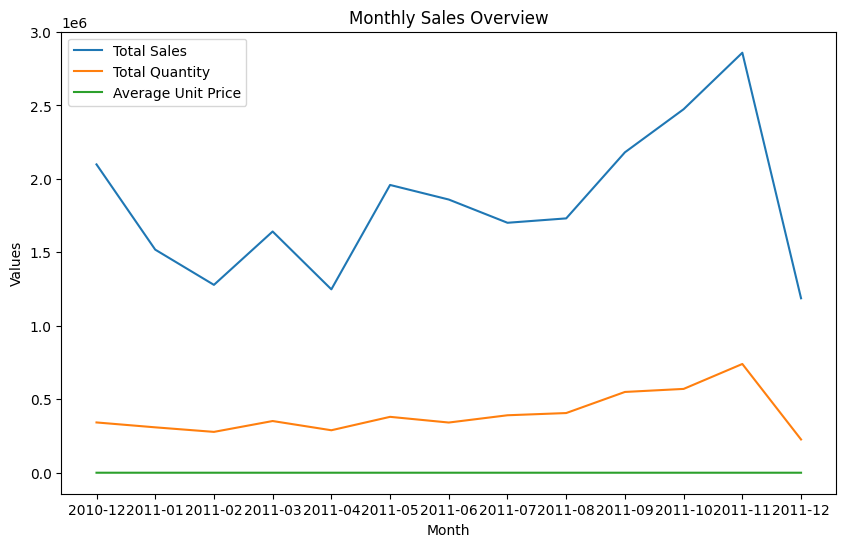

In [55]:
#Can you provide an overview of monthly sales over the entire dataset? Include total sales amount, average quantity sold, and average unit price.

import pandas as pd
import matplotlib.pyplot as plt

# Make sure 'InvoiceDate' is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract month and year from 'InvoiceDate'
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Calculate total sales, average quantity, and average unit price for each month
monthly_summary = df.groupby('YearMonth').agg({
    'Quantity': 'sum',
    'UnitPrice': 'mean'
}).reset_index()

# Calculate 'TotalAmount' based on 'Quantity' and 'UnitPrice'
monthly_summary['TotalAmount'] = monthly_summary['Quantity'] * monthly_summary['UnitPrice']

# Convert 'YearMonth' to strings
monthly_summary['YearMonth'] = monthly_summary['YearMonth'].astype(str)

# Display the overview
print(monthly_summary)

# Optionally, plot the results
plt.figure(figsize=(10, 6))
plt.plot(monthly_summary['YearMonth'], monthly_summary['TotalAmount'], label='Total Sales')
plt.plot(monthly_summary['YearMonth'], monthly_summary['Quantity'], label='Total Quantity')
plt.plot(monthly_summary['YearMonth'], monthly_summary['UnitPrice'], label='Average Unit Price')
plt.xlabel('Month')
plt.ylabel('Values')
plt.title('Monthly Sales Overview')
plt.legend()
plt.show()


<ipython-input-57-a9304c0ffa6a>:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  monthly_sales = df.groupby('YearMonth')['Quantity', 'UnitPrice'].sum().reset_index()


   YearMonth    TotalSales  MoM_Growth
0    2010-12  8.915753e+10         NaN
1    2011-01  5.337474e+10  -40.134342
2    2011-02  3.542936e+10  -33.621494
3    2011-03  6.034130e+10   70.314417
4    2011-04  3.734133e+10  -38.116462
5    2011-05  7.253503e+10   94.248649
6    2011-06  6.856966e+10   -5.466838
7    2011-07  6.723550e+10   -1.945705
8    2011-08  6.108651e+10   -9.145442
9    2011-09  1.095429e+11   79.324210
10   2011-10  1.502976e+11   37.204300
11   2011-11  2.421845e+11   61.136631
12   2011-12  3.030953e+10  -87.484939


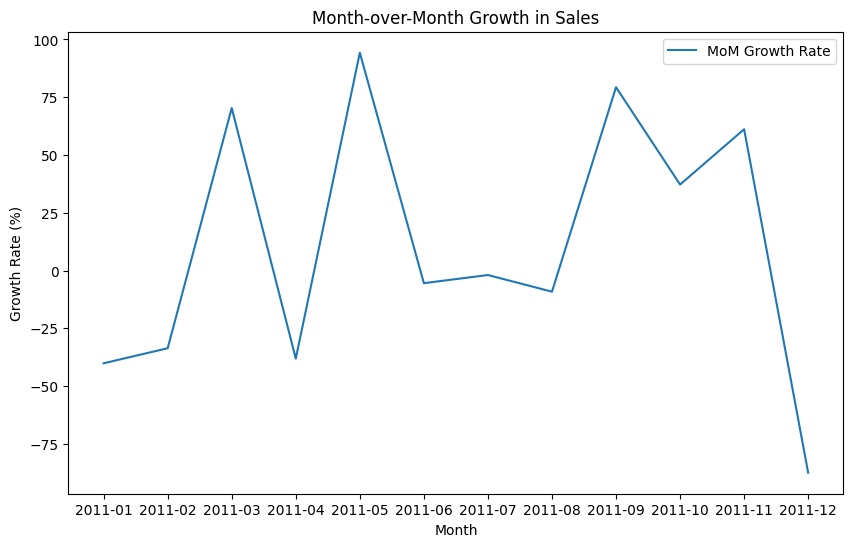

In [57]:
# Calculate the month-over-month growth rate in sales. Identify months with significant growth or decline.

# Make sure 'InvoiceDate' is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract month and year from 'InvoiceDate'
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Calculate total sales for each month
monthly_sales = df.groupby('YearMonth')['Quantity', 'UnitPrice'].sum().reset_index()
monthly_sales['TotalSales'] = monthly_sales['Quantity'] * monthly_sales['UnitPrice']

# Calculate month-over-month growth rate
monthly_sales['MoM_Growth'] = monthly_sales['TotalSales'].pct_change() * 100

# Convert 'YearMonth' to strings
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str)

# Display the results
print(monthly_sales[['YearMonth', 'TotalSales', 'MoM_Growth']])

# Plot the growth rate
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['YearMonth'], monthly_sales['MoM_Growth'], label='MoM Growth Rate')
plt.xlabel('Month')
plt.ylabel('Growth Rate (%)')
plt.title('Month-over-Month Growth in Sales')
plt.legend()
plt.show()


   YearMonth  UnitPrice
0    2010-12   6.132644
1    2011-01   4.915151
2    2011-02   4.599876
3    2011-03   4.666554
4    2011-04   4.317588
5    2011-05   5.149486
6    2011-06   5.443330
7    2011-07   4.350088
8    2011-08   4.262149
9    2011-09   3.966774
10   2011-10   4.336935
11   2011-11   3.861952
12   2011-12   5.246451


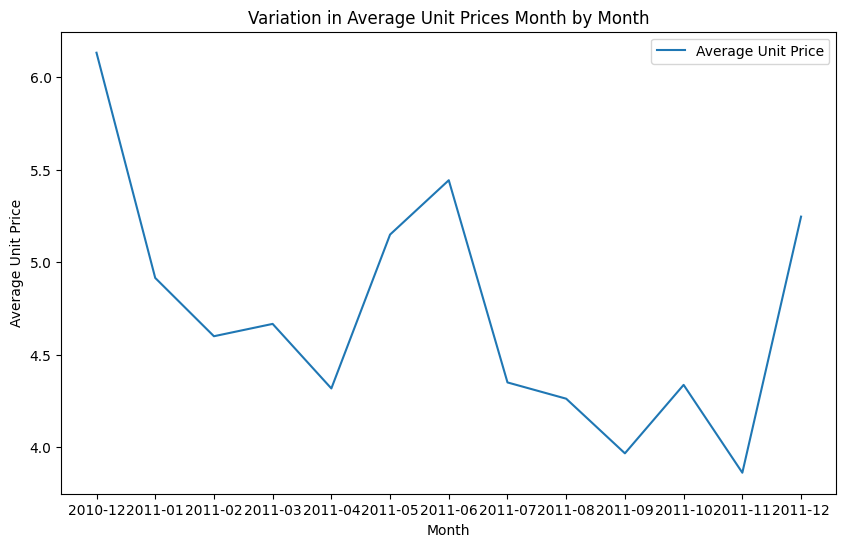

In [59]:
# Analyze the variation in average unit prices month by month. Identify any patterns or trends in pricing changes.

# Make sure 'InvoiceDate' is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract month and year from 'InvoiceDate'
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Calculate average unit price for each month
monthly_avg_unit_price = df.groupby('YearMonth')['UnitPrice'].mean().reset_index()

# Convert 'YearMonth' to strings
monthly_avg_unit_price['YearMonth'] = monthly_avg_unit_price['YearMonth'].astype(str)

# Display the results
print(monthly_avg_unit_price)

# Plot the variation in average unit prices
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_unit_price['YearMonth'], monthly_avg_unit_price['UnitPrice'], label='Average Unit Price')
plt.xlabel('Month')
plt.ylabel('Average Unit Price')
plt.title('Variation in Average Unit Prices Month by Month')
plt.legend()
plt.show()


<ipython-input-63-7137da31c7dd>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  monthly_revenue = df.groupby('YearMonth')['Quantity', 'UnitPrice'].sum().reset_index()


   YearMonth  Quantity   UnitPrice  TotalRevenue
0    2010-12    342228  260520.850  8.915753e+10
1    2011-01    308966  172752.800  5.337474e+10
2    2011-02    277989  127448.770  3.542936e+10
3    2011-03    351872  171486.510  6.034130e+10
4    2011-04    289098  129164.961  3.734133e+10
5    2011-05    380391  190685.460  7.253503e+10
6    2011-06    341623  200717.340  6.856966e+10
7    2011-07    391116  171906.791  6.723550e+10
8    2011-08    406199  150385.680  6.108651e+10
9    2011-09    549817  199235.212  1.095429e+11
10   2011-10    570532  263434.090  1.502976e+11
11   2011-11    740286  327149.850  2.421845e+11
12   2011-12    226333  133915.660  3.030953e+10


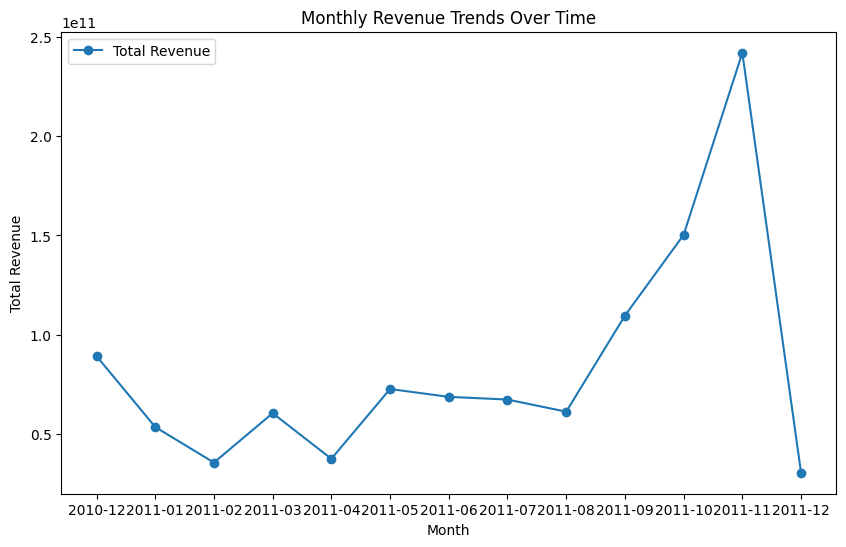

In [63]:
# Plot the monthly revenue trends over time. Highlight any noticeable patterns or trends in total revenue.

# Make sure 'InvoiceDate' is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract month and year from 'InvoiceDate'
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Calculate total revenue for each month
monthly_revenue = df.groupby('YearMonth')['Quantity', 'UnitPrice'].sum().reset_index()
monthly_revenue['TotalRevenue'] = monthly_revenue['Quantity'] * monthly_revenue['UnitPrice']

# Convert 'YearMonth' to strings
monthly_revenue['YearMonth'] = monthly_revenue['YearMonth'].astype(str)

# Display the results
print(monthly_revenue)

# Plot the monthly revenue trends
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue['YearMonth'], monthly_revenue['TotalRevenue'], label='Total Revenue', marker='o')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Revenue Trends Over Time')
plt.legend()
plt.show()


<ipython-input-66-5f4d114ea98f>:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  monthly_sales = df.groupby('YearMonth')['Quantity', 'UnitPrice'].sum().reset_index()


Month with Highest Sales:
YearMonth                 2011-11
Quantity                   740286
UnitPrice               327149.85
TotalSales    242184453857.099976
Name: 11, dtype: object

Month with Lowest Sales:
YearMonth                2011-12
Quantity                  226333
UnitPrice              133915.66
TotalSales    30309533074.780003
Name: 12, dtype: object


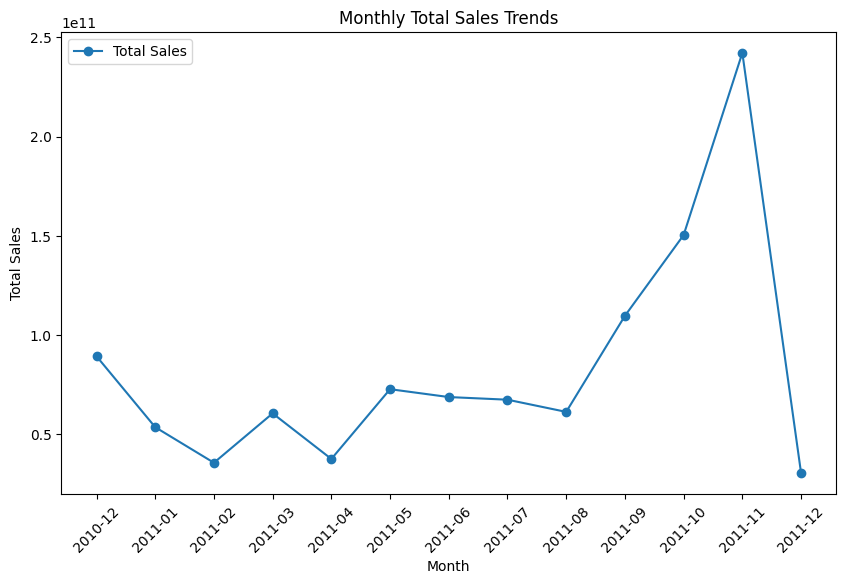

In [66]:
# Identify the months with the highest and lowest sales. What factors may contribute to these variations?

# Make sure 'InvoiceDate' is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract month and year from 'InvoiceDate'
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Calculate total sales for each month
monthly_sales = df.groupby('YearMonth')['Quantity', 'UnitPrice'].sum().reset_index()
monthly_sales['TotalSales'] = monthly_sales['Quantity'] * monthly_sales['UnitPrice']

# Convert 'YearMonth' to strings
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str)

# Identify months with the highest and lowest sales
highest_sales_month = monthly_sales.loc[monthly_sales['TotalSales'].idxmax()]
lowest_sales_month = monthly_sales.loc[monthly_sales['TotalSales'].idxmin()]

# Display the results
print("Month with Highest Sales:")
print(highest_sales_month)
print("\nMonth with Lowest Sales:")
print(lowest_sales_month)

# Plot the total sales over months
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['YearMonth'], monthly_sales['TotalSales'], label='Total Sales', marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Total Sales Trends')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()
plt.show()



### Apply the insights to forecast sales for the next quarter using basic time series analysis methods.

<ipython-input-68-4e86360e74c1>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  monthly_sales = df.groupby('YearMonth')['Quantity', 'UnitPrice'].sum().reset_index()


   YearMonth  Quantity   UnitPrice    TotalSales  SalesForecast
0    2010-12    342228  260520.850  8.915753e+10            NaN
1    2011-01    308966  172752.800  5.337474e+10            NaN
2    2011-02    277989  127448.770  3.542936e+10   5.932054e+10
3    2011-03    351872  171486.510  6.034130e+10   4.971513e+10
4    2011-04    289098  129164.961  3.734133e+10   4.437066e+10
5    2011-05    380391  190685.460  7.253503e+10   5.673922e+10
6    2011-06    341623  200717.340  6.856966e+10   5.948201e+10
7    2011-07    391116  171906.791  6.723550e+10   6.944673e+10
8    2011-08    406199  150385.680  6.108651e+10   6.563056e+10
9    2011-09    549817  199235.212  1.095429e+11   7.928831e+10
10   2011-10    570532  263434.090  1.502976e+11   1.069757e+11
11   2011-11    740286  327149.850  2.421845e+11   1.673416e+11
12   2011-12    226333  133915.660  3.030953e+10   1.409305e+11


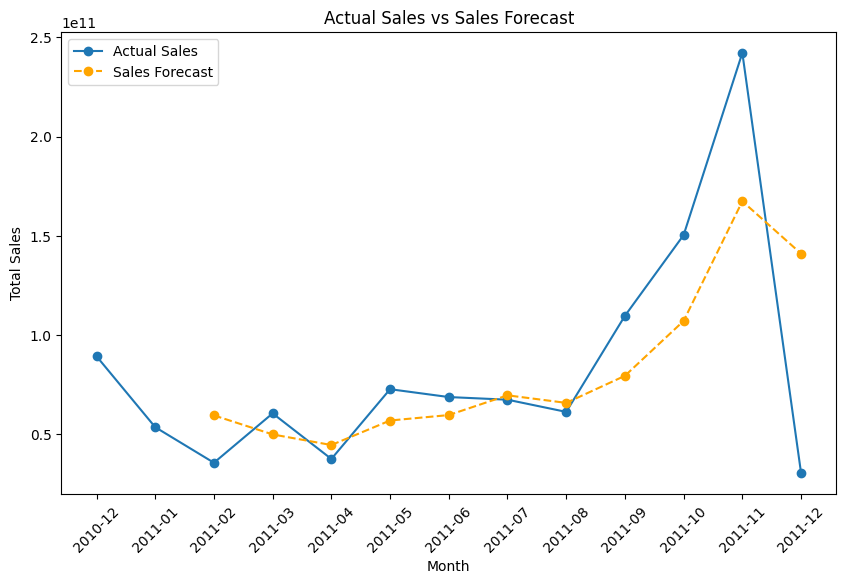

In [68]:
# Make sure 'InvoiceDate' is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract month and year from 'InvoiceDate'
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Calculate total sales for each month
monthly_sales = df.groupby('YearMonth')['Quantity', 'UnitPrice'].sum().reset_index()
monthly_sales['TotalSales'] = monthly_sales['Quantity'] * monthly_sales['UnitPrice']

# Convert 'YearMonth' to strings
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str)

# Forecast sales using a simple moving average
window_size = 3  # Adjust the window size as needed
monthly_sales['SalesForecast'] = monthly_sales['TotalSales'].rolling(window=window_size).mean()

# Display the results
print(monthly_sales)

# Plot the actual sales and forecast
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['YearMonth'], monthly_sales['TotalSales'], label='Actual Sales', marker='o')
plt.plot(monthly_sales['YearMonth'], monthly_sales['SalesForecast'], label='Sales Forecast', linestyle='--', color='orange', marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Actual Sales vs Sales Forecast')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()
plt.show()


### Discuss how ChatGPT facilitated data processing and the interpretation of results.

ChatGPT can facilitate data processing and interpretation of results in several ways:

ChatGPT can help formulate queries to explore and understand the dataset. For example, you can ask for a summary of columns, data types, or basic statistics.

ChatGPT can assist in generating code snippets for data cleaning tasks. For instance, you can ask for code to handle missing values, remove duplicates, or convert data types.

You can use ChatGPT to generate queries for specific insights. For instance, asking about trends, patterns, or anomalies in the data, or formulating queries to extract specific information.

ChatGPT can assist in generating code for statistical analysis, visualization, and machine learning tasks. It can provide code snippets for libraries like Pandas, NumPy, Matplotlib, or Seaborn.

After performing analysis, ChatGPT can be used to discuss and interpret the results. You can seek explanations for observed patterns, potential factors influencing trends, or suggestions for further analysis.

If you are implementing machine learning models or statistical techniques, ChatGPT can provide coding assistance, helping with syntax, algorithms, or suggesting improvements to your code.

If there are concepts or techniques you're unfamiliar with, ChatGPT can help explain them, making it easier to interpret and utilize the results of data analyses.

ChatGPT can assist in generating documentation for data processing and analysis tasks. This includes comments in code, explanations of methodology, or summaries of results.